In [1]:
import sys
import os

# Add the parent directory of the current directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Verify the updated Python path
print("Updated Python Path:", sys.path)


Updated Python Path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\User\\image_degradation_project\\venv', '', 'c:\\Users\\User\\image_degradation_project\\venv\\Lib\\site-packages', 'c:\\Users\\User\\image_degradation_project\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\User\\image_degradation_project\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\image_degradation_project\\venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\User\\image_degradation_project']


In [2]:
import matplotlib.pyplot as plt
from utils.utils import load_image, resize_image
from main import apply_degradation
import cv2

In [5]:
%matplotlib notebook
%matplotlib inline

## Floyd-Steinberg Halftoning visualization side by side with the original image:

image equalized
0.7
Image resized to: (4120, 3084)
Image saved to: ../datasets/degraded/halftoning/FRAN_0568_000220_L_floyd_steinberg_halftoning.jpg


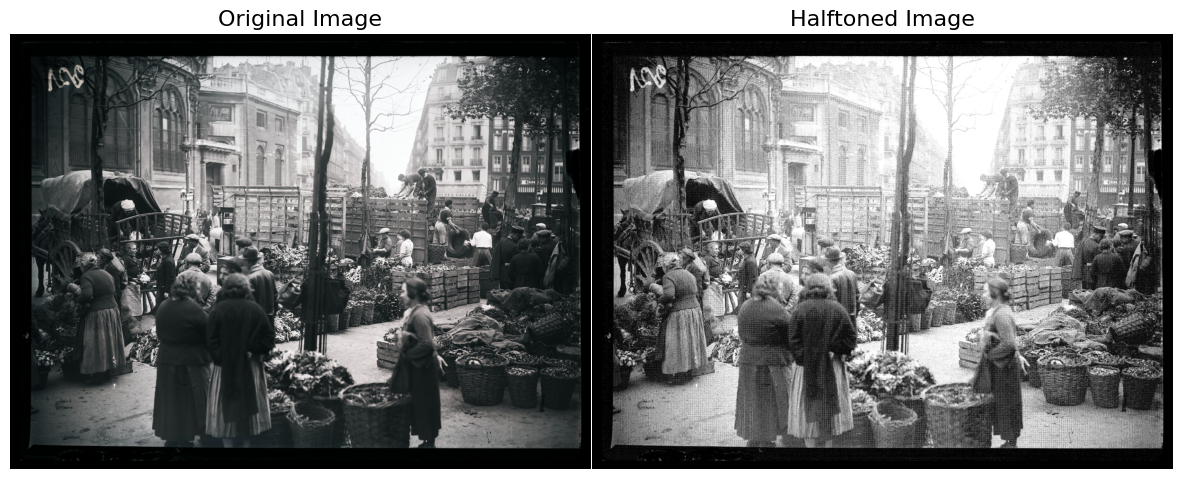

In [6]:
from methods.halftoning.floyd_steinberg import floyd_steinberg_halftoning

input_path = "../datasets/original/FRAN_0568_000220_L.jpg"
output_folder = "../datasets/degraded/halftoning/"
downscale_factor = 0.7

# Apply the degradation
output_path = apply_degradation(
    method=floyd_steinberg_halftoning,
    input_path=input_path,
    output_folder=output_folder,
    downscale_factor=downscale_factor,
    block_size=8
)

# Load the original and halftoned images
original_image = cv2.imread(input_path, cv2.IMREAD_COLOR)
halftoned_image = load_image(output_path, to_grayscale=True)

# Create a side-by-side comparison
plt.figure(figsize=(15, 8))  
plt.subplot(1, 2, 1)
plt.title("Original Image", fontsize=16)
plt.imshow(original_image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Halftoned Image", fontsize=16)
plt.imshow(halftoned_image, cmap="gray") 
plt.axis("off")

plt.subplots_adjust(wspace=0.001)

plt.show()